# Parte 2- Análise de Dados e IA

Autor: Gabriel Haenni Zimerman


Dataset: https://drive.google.com/file/d/1wgUnkmZ1H0ew-uBpQCJUKxrYOQCqyy2q/view?usp=share_link

Descrição do dataset: 
1. ID - Identificação;
2. AGE - Idade;
3. GENDER - Gênero;
4. RACE - Etnia;
5. DRIVING_EXPERIENCE - Anos de experiência no volante;
6. EDUCATION - Nível de educação formal;
7. INCOME - Categoria de renda;
8. CREDIT_SCORE - Pontuação de crédito. Reflete o quão bom pagador o indivíduo é;
9. VEHICLE_OWNERSHIP - Posse do veículo. Se o segurado é proprietário do veículo que dirige ou não;
10. VEHICLE_YEAR - Idade do veículo. Se o carro é anterior ou posterior ao ano de 2015;
11. MARRIED - Estado Civil;
12. CHILDREN - Se o indivíduo possui filhos ou não;
13. LOCALITY- Localidade;
14. ANNUAL_MILEAGE - Quilometragem anual percorrida;
15. VEHICLE_TYPE - Tipo de automóvel;
16. SPEEDING_VIOLATIONS - Número de infrações cometidas pelo segurado por excesso de velocidade;
17. DUIS - Número de infrações cometidas pelo segurado por embriaguez ao volante;
18. PAST_ACCIDENTS - Número de acidentes passados com o segurado envolvido.
19. OUTCOME - Resultado da reclamação de seguro (isto é, se a insurance claim foi aprovada ou recusada).


## Setup

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
insurance = pd.read_csv('insurance_claim.csv')

## Visão geral

In [54]:
insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,LOCALITY,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,yes,after 2015,no,yes,New York,12000.0,sedan,0,0,0,approved
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,no,before 2015,no,no,New York,16000.0,sedan,0,0,0,denied
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,yes,before 2015,no,no,New York,11000.0,sedan,0,0,0,approved
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,yes,before 2015,no,yes,Miami,11000.0,sedan,0,0,0,approved
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,yes,before 2015,no,no,Miami,12000.0,sedan,2,0,1,denied


Observe na tabela acima que temos dados qualitativos (ex:"Gender") e dados quantitativos(ex:"Credit_Score"). Queremos entender qual a correlação entre esses dados e a última coluna "Outcome".

In [55]:
insurance.describe().drop(columns=['ID'])

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.515813,11697.003207,1.482900,0.23920,1.056300
std,0.130752,2680.167384,2.241966,0.55499,1.652454
min,0.053358,2000.000000,0.000000,0.00000,0.000000
25%,0.431509,10000.000000,0.000000,0.00000,0.000000
50%,0.515813,11697.003207,0.000000,0.00000,0.000000
75%,0.607607,13000.000000,2.000000,0.00000,2.000000
max,0.960819,22000.000000,22.000000,6.00000,15.000000


A tabela acima fornece algumas informações sobre as variáveis quantitativas na base de dados. Sabemos, por exemplo, que a média das infrações por velocidade é 1.48. Tais informações podem ser úteis para analisarmos a dispersão individuo-população.

## Análise de Features 

### AGE

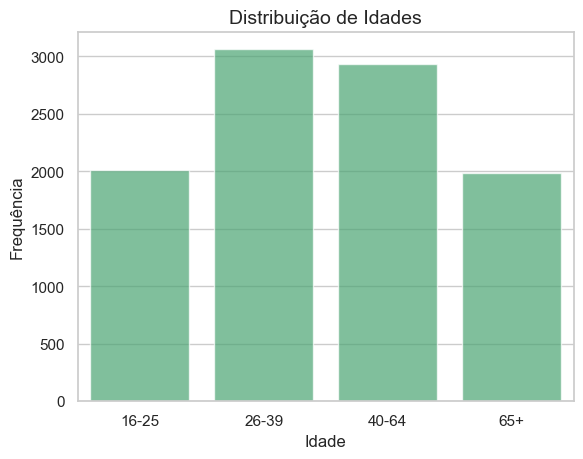

In [56]:
sns.set(style='whitegrid')

ordem_idades = ['16-25', '26-39', '40-64', '65+']

sns.countplot(data=insurance, x='AGE', order=ordem_idades, color='mediumseagreen', alpha=0.7)


plt.title('Distribuição de Idades', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)



plt.show()

Observe que a maioria dos indivíduos analisados possuem entre 26 e 64 anos.

### ANNUAL MILEAGE

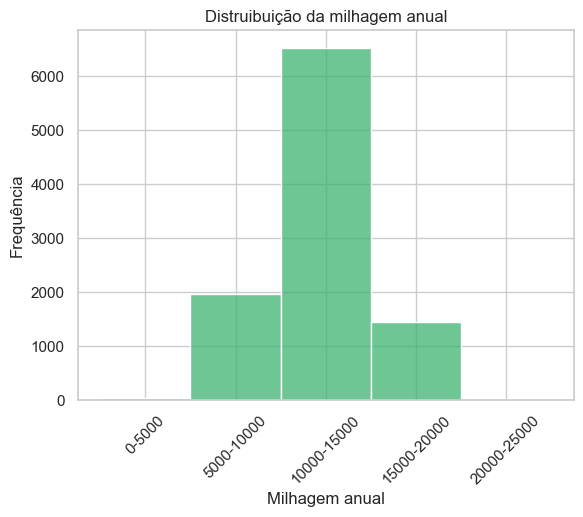

In [57]:

bins = range(0,25001,5000)


sns.histplot(data=insurance,x='ANNUAL_MILEAGE', bins=bins, color='mediumseagreen' )

bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

plt.xticks(bin_centers,bin_labels, rotation = 45)

plt.title('Distruibuição da milhagem anual')
plt.xlabel('Milhagem anual', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


A Ampla maioria dos analisados possuem uma milhagem anual de 10000-150000 milhas por ano.

### CHILDREN

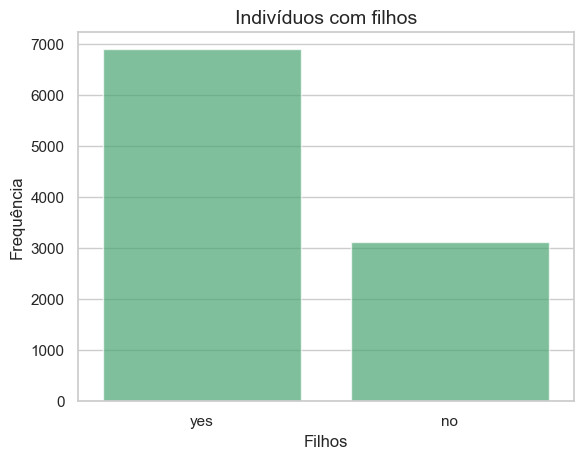

In [58]:
sns.set(style='whitegrid')

sns.countplot(data=insurance, x='CHILDREN', color='mediumseagreen', alpha=0.7)


plt.title('Indivíduos com filhos', fontsize=14)
plt.xlabel('Filhos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)



plt.show()

Vemos que aproximadamente 70% dos indivíduos possuem filhos.

### MARRIED

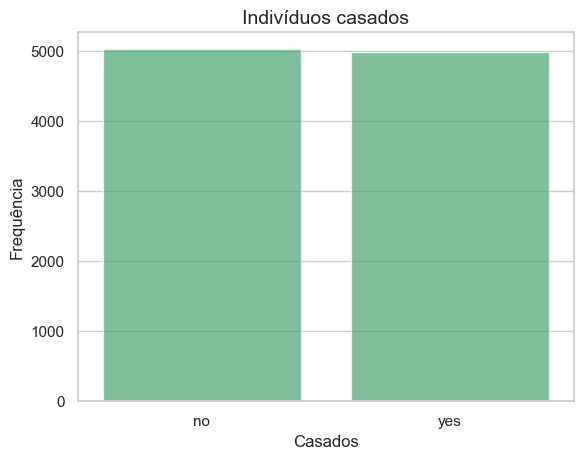

In [59]:
sns.set(style='whitegrid')

sns.countplot(data=insurance, x='MARRIED', color='mediumseagreen', alpha=0.7)


plt.title('Indivíduos casados', fontsize=14)
plt.xlabel('Casados', fontsize=12)
plt.ylabel('Frequência', fontsize=12)



plt.show()

Observe que aproximadamente 50% dos indivíduos são casados.

### Relação entre as colunas MARRIED e AGE

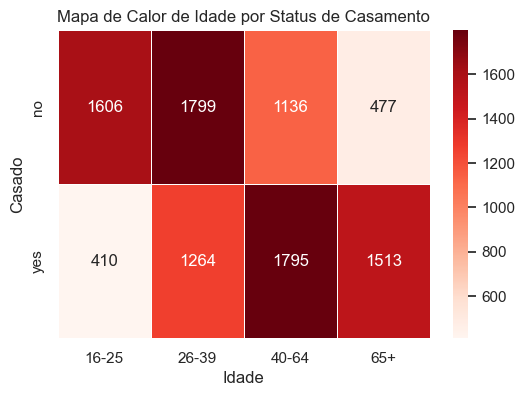

In [60]:
tabela_contingencia = pd.crosstab(insurance['MARRIED'], insurance['AGE'])


plt.figure(figsize=(6, 4))
sns.heatmap(tabela_contingencia, annot=True, fmt="d",cmap="Reds", linewidths=0.5)


plt.title("Mapa de Calor de Idade por Status de Casamento")
plt.xlabel("Idade")
plt.ylabel("Casado")
plt.show()

Podemos ver que há uma correção positiva entre idade e estar casado, pois a proporção de indivíduos casados aumenta significamente conforme as faixas mais velhas são analisadas.

### Relação entre as colunas CHILDREN e AGE

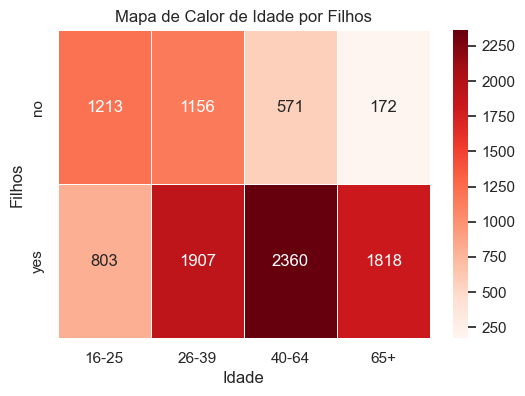

In [61]:
tabela_contingencia = pd.crosstab(insurance['CHILDREN'], insurance['AGE'])


plt.figure(figsize=(6, 4))
sns.heatmap(tabela_contingencia, annot=True, fmt="d",cmap="Reds", linewidths=0.5)


plt.title("Mapa de Calor de Idade por Filhos")
plt.xlabel("Idade")
plt.ylabel("Filhos")
plt.show()

Similarmente ao mapa anterior, vemos que há uma correção positiva entre idade e ter filhos. Observe que entre os indivíduos com 65+ anos quase todos possuem pelo menos 1 filho.

### Relação entre as colunas ANNUAL MILEAGE e AGE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


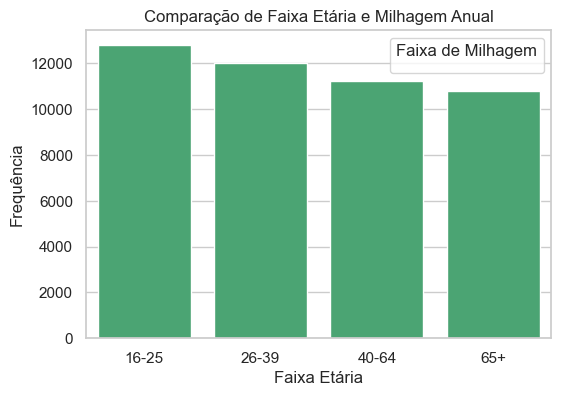

In [62]:

plt.figure(figsize=(6, 4))

ordem_idades = ['16-25', '26-39', '40-64', '65+']


sns.barplot(data=insurance, x='AGE', y='ANNUAL_MILEAGE', order=ordem_idades,  color='mediumseagreen', errorbar=None)

plt.title('Comparação de Faixa Etária e Milhagem Anual')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.legend(title='Faixa de Milhagem')
plt.show()

Vemos que motoristas mais novos possuem uma milhagem anual maior.

## Análise do Outcome

### Relação entreANNUAL MILEAGE, AGE e OUTCOME

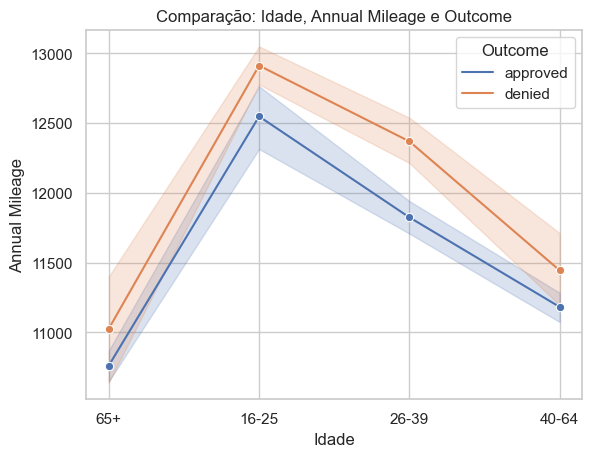

In [68]:




sns.lineplot(data=insurance, x='AGE', y='ANNUAL_MILEAGE', hue='OUTCOME', marker='o')



plt.title('Comparação: Idade, Annual Mileage e Outcome')
plt.xlabel('Idade')
plt.ylabel('Annual Mileage')
plt.legend(title='Outcome')
plt.show()

O gráfico acima demonstra que, dentro da mesma faixa etária, pessoas com uma maior milhagem anual tendem a ter uma chance maior de ter o seguro negado.

### Relação entre  CHILDREN, MARRIED e OUTCOME

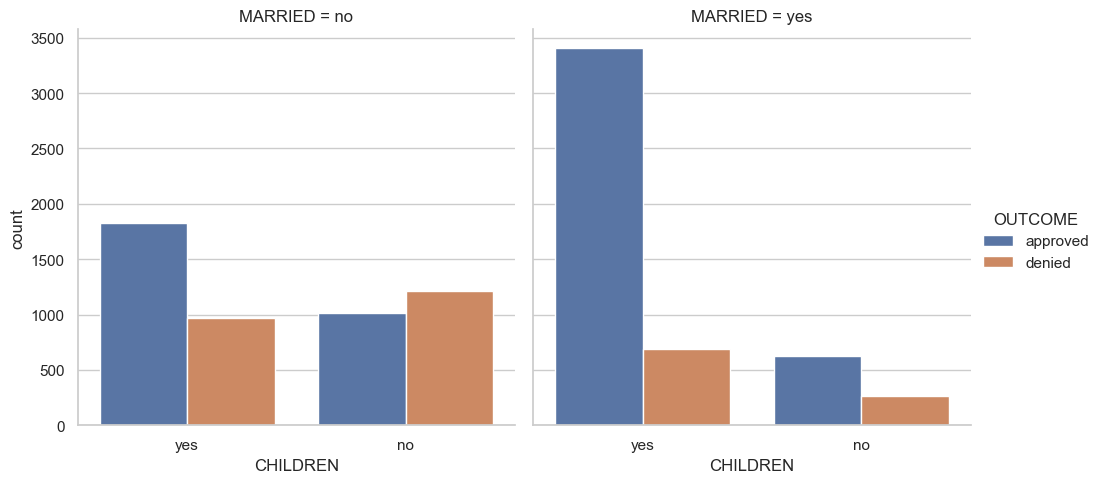

In [74]:
sns.catplot(data=insurance, x='CHILDREN', col='MARRIED', hue='OUTCOME', kind='count')




plt.show()

Observe que indivíduos com filhos possuem maior chance de serem aprovados, em especial indivíduos casados e com filhos. A única proporção desfavorável para ser aprovado é na faixa de indivíduos que não são casados e não possuem filhos.

### Relaçao entre AGE e OUTCOME

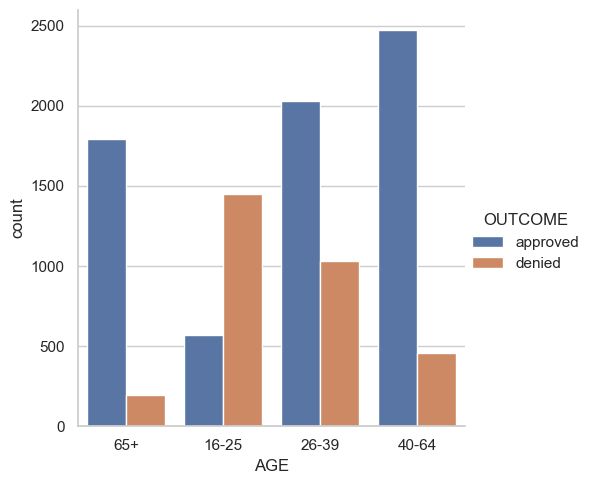

In [75]:
sns.catplot(data=insurance, x='AGE', hue='OUTCOME', kind='count')




plt.show()

Por fim, vemos que a idade é determinante para saber a probabilidade de ser aprovado ou não. Indíviduos mais jovens possuem significativamente menos chance de serem aprovados.

## Conclusões

A partir dos dados analisados podemos chegar a algumas conclusões interessantes, especialmente, quando analisamos a correlção entre a idade com outras variáveis. Observamos que indivíduos mais novos tem menor chance de terem filhos ou serem casados e maior chance de terem uma milhagem anual alta. Outro dado importe que descobrimos é que pessoas jovens tem menor chance de serem aprovadas pela seguradora, assim como pessoas que não são casadas e não possuem filhos. Por outro lado, indivíduos casados, com filhos e com mais de 65 anos possuem alta probabilidade de serem aceitas pela seguradora.

## Referências

1.https://medium.com/turing-talks/turing-talks-9-visualiza%C3%A7%C3%A3o-de-dados-93df670d479
2.https://github.com/turing-usp/Arvore-de-Habilidades/blob/master/Exemplos/Analise%20Wine/analise_wine.ipynb
3.https://seaborn.pydata.org/tutorial/introduction.html
